In [149]:
import pandas as pd
df=pd.read_csv('heart.csv')

In [150]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [152]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [153]:
#Encode categorical values
from sklearn.preprocessing import LabelEncoder
label_encoders={}
for col in df.select_dtypes(include=['object']).columns:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
    label_encoders[col]=le

In [154]:
#Define features and target variable
x=df.drop(columns=['target'])
y=df['target']
#Split Dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [155]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [156]:
#Train SVM with linear kernel
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear',C=1)
svm_linear.fit(x_train,y_train)
y_pred_linear=svm_linear.predict(x_test)

In [157]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy:",accuracy_score(y_test,y_pred_linear))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_linear))

Accuracy: 0.8146341463414634
Confusion Matrix:
 [[72 30]
 [ 8 95]]


In [158]:
# Train SVM with polynomial kernel
svm_poly=SVC(kernel='poly',degree=3,C=1)
svm_poly.fit(x_train,y_train)
y_pred_poly=svm_poly.predict(x_test)

In [159]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy:",accuracy_score(y_test,y_pred_poly))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_poly))

Accuracy: 0.9073170731707317
Confusion Matrix:
 [[ 85  17]
 [  2 101]]


In [160]:
# Train SVM with RBF kernel
svm_rbf=SVC(kernel='rbf',C=1,gamma='scale')
svm_rbf.fit(x_train,y_train)
y_pred_rbf=svm_rbf.predict(x_test)

In [161]:
print("Accuracy:",accuracy_score(y_test,y_pred_rbf))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_rbf))

Accuracy: 0.8878048780487805
Confusion Matrix:
 [[85 17]
 [ 6 97]]


# Loan Prediction

In [162]:
df=pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [164]:
df = df[['ApplicantIncome', 'LoanAmount', 'Credit_History','Self_Employed', 'Loan_Status']]


In [165]:
df.isnull().sum()

ApplicantIncome     0
LoanAmount         22
Credit_History     50
Self_Employed      32
Loan_Status         0
dtype: int64

In [166]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [167]:
df.isnull().sum()

ApplicantIncome    0
LoanAmount         0
Credit_History     0
Self_Employed      0
Loan_Status        0
dtype: int64

In [168]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = ['Self_Employed', 'Loan_Status']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [169]:
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [170]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [171]:
svm_linear=SVC(kernel='linear',C=1)
svm_linear.fit(x_train,y_train)
y_pred_linear=svm_linear.predict(x_test)
svm_poly=SVC(kernel='poly',degree=3,C=1)
svm_poly.fit(x_train,y_train)
y_pred_poly=svm_poly.predict(x_test)
svm_rbf=SVC(kernel='rbf',C=1,gamma='scale')
svm_rbf.fit(x_train,y_train)
y_pred_rbf=svm_rbf.predict(x_test)

In [172]:
print("Linear Kernel Results:")
print("Accuracy:",accuracy_score(y_test,y_pred_linear))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_linear))
print("\nPolynomial Kernel Results:")
print("Accuracy:",accuracy_score(y_test,y_pred_poly))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_poly))
print("\nRBF Kernel Results:")
print("Accuracy:",accuracy_score(y_test,y_pred_rbf))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_rbf))

Linear Kernel Results:
Accuracy: 0.7727272727272727
Confusion Matrix:
 [[21 33]
 [ 2 98]]

Polynomial Kernel Results:
Accuracy: 0.7727272727272727
Confusion Matrix:
 [[21 33]
 [ 2 98]]

RBF Kernel Results:
Accuracy: 0.7792207792207793
Confusion Matrix:
 [[21 33]
 [ 1 99]]


In [173]:
import numpy as np
new_applicant = np.array([[50000, 150, 1, 1]])
new_applicant = scaler.transform(new_applicant)
result = svm_rbf.predict(new_applicant)
if result[0] == 1:
    print("Loan Approved")
else:
    print("Loan Rejected")


Loan Approved


c:\Users\srira\OneDrive\Desktop\machine learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Accuracy')

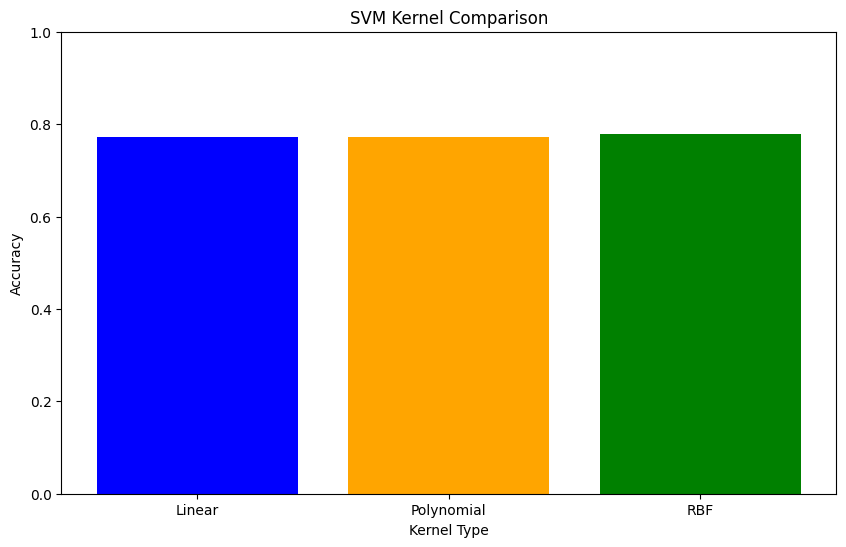

In [175]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
kernels = ['Linear', 'Polynomial', 'RBF']
accuracies = [accuracy_score(y_test,y_pred_linear),
              accuracy_score(y_test,y_pred_poly),
              accuracy_score(y_test,y_pred_rbf)]
plt.bar(kernels, accuracies, color=['blue', 'orange', 'green'])
plt.ylim(0, 1)
plt.title('SVM Kernel Comparison')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')


In [185]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_linear)
print(cm)
FN = cm[1][0]
print("Eligible customers rejected:", FN)
FP = cm[0][1]
print("Risky customers approved:", FP)

[[21 33]
 [ 2 98]]
Eligible customers rejected: 2
Risky customers approved: 33
